In [1]:
import pprint
import numpy as np
import seaborn as sns

from utils import Utils
from pipeline import HsiPipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
##
#
folder = '/Users/Usuario/Documents/Pipeline HSI/HyperSI/Plastico B'
samples_dict = Utils.get_dict(samples=Utils.load_samples(folder))

pprint.pprint(samples_dict)

{'Bacillusscereus_14579_Plastico_B_180926-092335': [1],
 'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [2],
 'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [3],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [4],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [5],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [6],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [7],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [8],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [9]}


In [3]:
pipeline = HsiPipeline(data_folder=folder, samples=samples_dict)

In [5]:
pipeline.process_images()

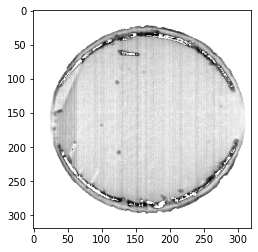

In [4]:
pipeline.visualize_images()

In [4]:
X_train, X_test, y_train, y_test, target_names = pipeline.get_Xy(case=0, spectral_range=(1, 241))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(258037, 240) (258043, 240)
(258037,) (258043,)


In [5]:
models_file = 'models_pipeline_01.joblib'
print(models_file)

models_pipeline_01.joblib


In [6]:
from sklearn import (
    discriminant_analysis,
)

seed = 42
models =[
    discriminant_analysis.LinearDiscriminantAnalysis(covariance_estimator=None, 
                                                     n_components=None,
                                                     priors=None, shrinkage=None, 
                                                     solver='svd',store_covariance=False,
                                                     tol=0.0001),
    discriminant_analysis.QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, 
                                                        store_covariance=False, 
                                                        tol=0.0001),
    ]

for model in models:
    print(model.__class__.__name__)

LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis


LinearDiscriminantAnalysis
                                                                 precision    recall  f1-score   support

                 Bacillusscereus_14579_Plastico_B_180926-092335       0.97      0.94      0.95     29803
     Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210       0.94      0.86      0.90     30161
Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747       0.71      0.91      0.80     30078
            Enterococcusfaecalis_29212_Plastico_B_180926-093958       0.95      0.88      0.91     29245
            Klebsielapneumonial_700603_Plastico_B_180926-105913       0.95      0.92      0.93     30004
                Micrococcusluteus_9341_Plastico_B_180926-093534       1.00      0.98      0.99     19771
          Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046       1.00      0.89      0.94     29695
                   Salmonellaspp_10708_Plastico_B_180926-104803       0.87      0.90      0.89     29422
               Serratiamarc

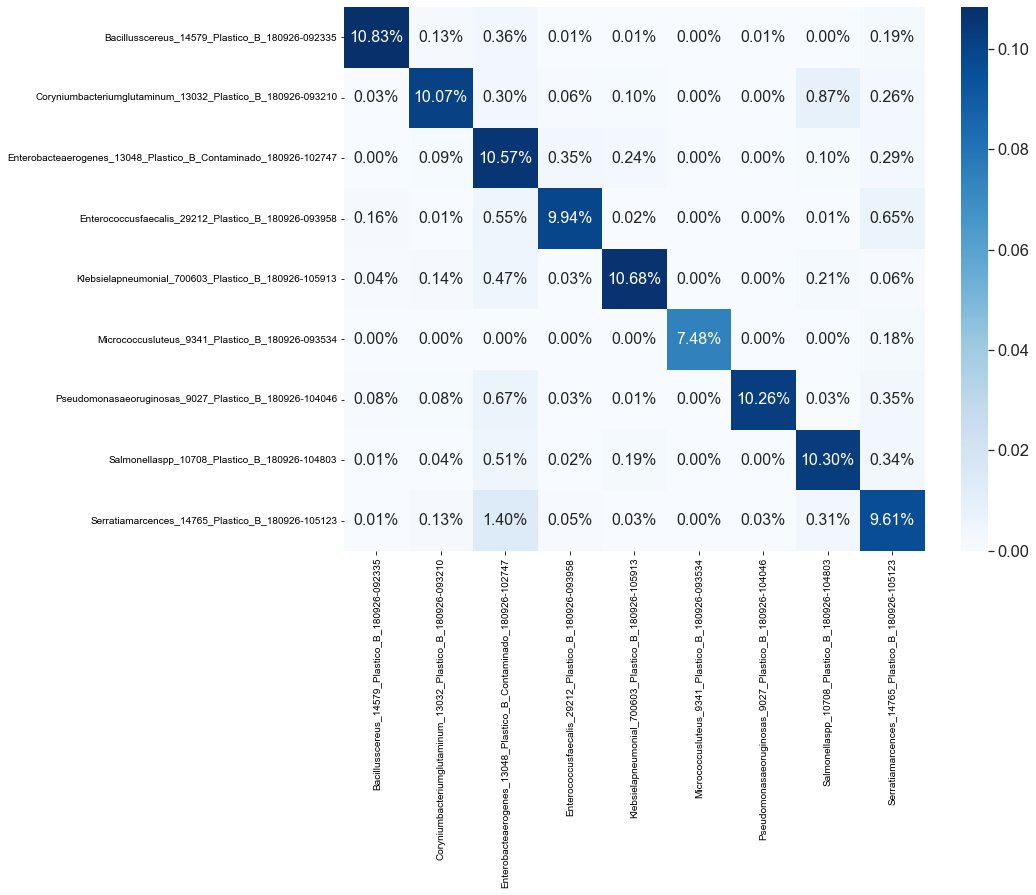

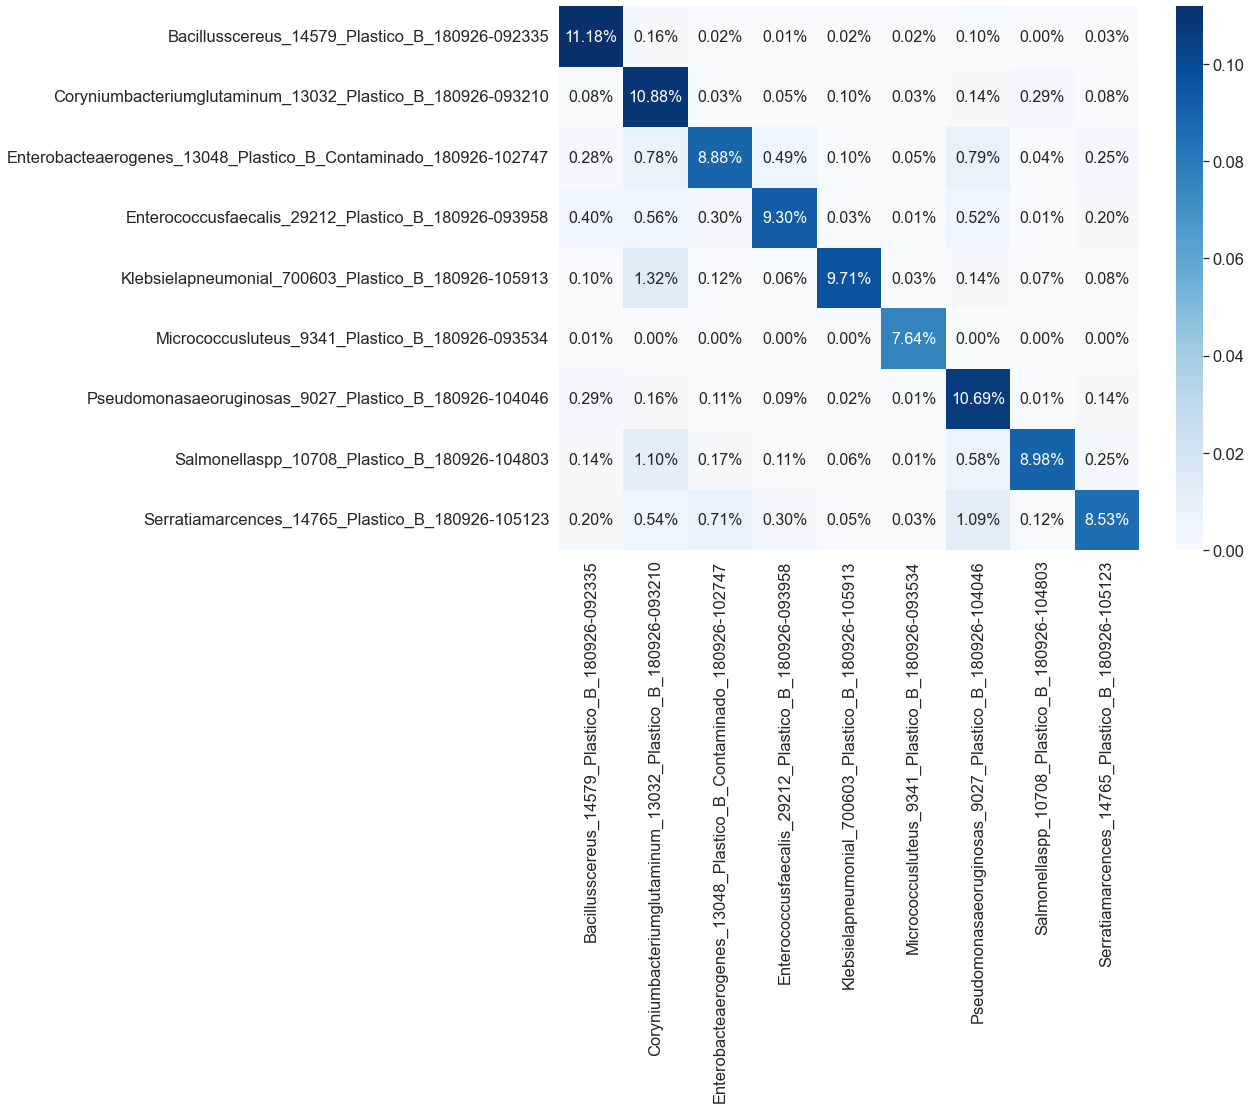

In [7]:
"""
    Everything will be saved in out_dir
"""

out_dir = 'outputs'
pipeline.train_models(x_train=X_train, 
                      x_test=X_test, 
                      y_train=y_train, 
                      y_test=y_test, 
                      models=models,
                      samples_dict=samples_dict,
                      target_names=target_names,
                      models_file=models_file,
                      work_dir=out_dir)